In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
plt.style.use('default')

import sys
sys.path.append("/cluster/home/yhgong/")

from python.modules.features.calculate_data.calculate_data2d import (
    Data2dAnalyzor,
    LosDispersionCalculationInfoModel,
    SimFileModel
)

In [2]:
simFile = SimFileModel(
    simPath="/lfs/data/yhgong/productionRun/mergerAGN/MHD/Cooling_Feedback_ContiRandom15",
    hdf5FilePrefix="perseus_merger_hdf5_plt_cnt",
    fileSterMyr=1
)

In [5]:
result = Data2dAnalyzor().losVelDispersion(
    axis="z",
    simFile=simFile,
    calculationInfo=LosDispersionCalculationInfoModel(
        timeMyr=3000,
        rBoxKpc=150
    )
)

yt : [INFO     ] 2024-05-11 10:51:08,986 Particle file found: perseus_merger_hdf5_part_3000


yt : [INFO     ] 2024-05-11 10:51:09,037 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-11 10:51:09,038 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-11 10:51:09,039 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-11 10:51:09,040 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-11 10:51:09,041 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-11 10:51:12,339 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-11 10:51:12,343 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-11 10:51:12,345 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-11 10:51:12,362 Adding ('gas','xray_emissivity_0.5_7.0_keV') field.
yt : [INFO     ] 2024-05-11 10:51:12,363 Adding ('gas','xray_luminosity_0.5_7.0_keV') fie

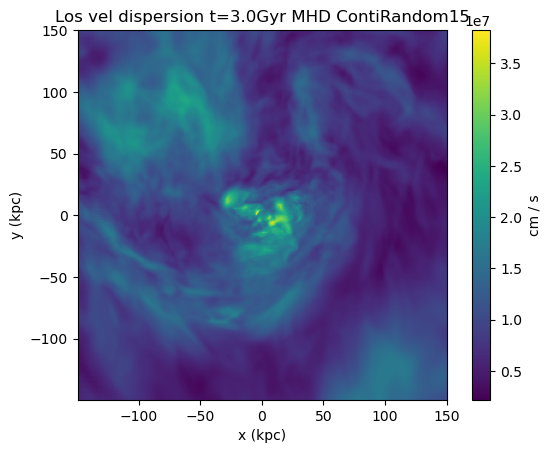

In [9]:
axisUnit = result.horizontalAxis[1].unit.to_string()
valueUnit = result.value.unit.to_string()
plt.imshow(
    np.flipud(result.value.value), 
    extent=[
        result.horizontalAxis[1].value[0], result.horizontalAxis[1].value[-1],
        result.verticalAxis[1].value[0], result.verticalAxis[1].value[-1],
    ]
)
plt.colorbar().set_label(f"{valueUnit}")
plt.title("Los vel dispersion t=3.0Gyr MHD ContiRandom15")
plt.xlabel(f"{result.horizontalAxis[0]} ({axisUnit})")
plt.ylabel(f"{result.verticalAxis[0]} ({axisUnit})")
plt.show()